In [1]:
# Copyright (c) 2020 Urbain Vaes. All rights reserved.
#
# This work is licensed under the terms of the MIT license.
# For a copy, see <https://opensource.org/licenses/MIT>.
import numpy as np
import scipy.special
import scipy.optimize
import matplotlib
import matplotlib.pyplot as plt

In [2]:
matplotlib.rc('font', size=20)
matplotlib.rc('font', family='serif')
matplotlib.rc('text', usetex=False)
matplotlib.rc('figure', figsize=(14, 8))
matplotlib.rc('lines', linewidth=2)

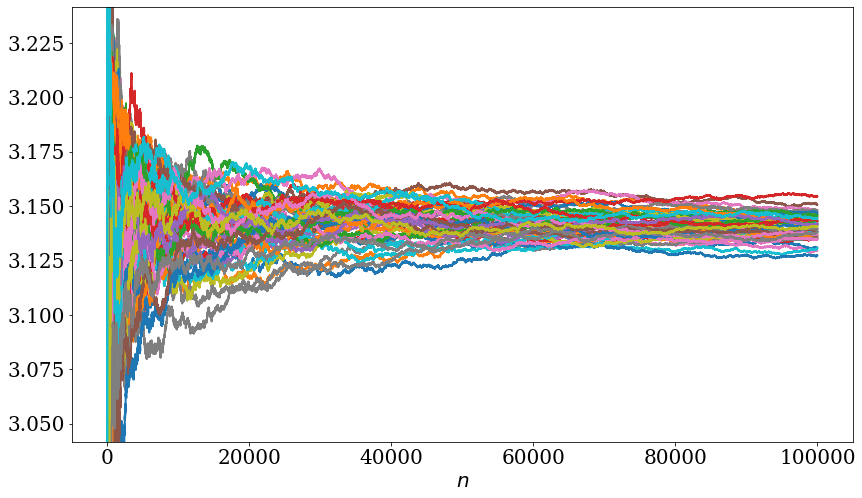

In [3]:
# Fix the seed
np.random.seed(0)


def MC_circle(n, return_all=True):

    # Sample from uniform distribution on [-1, 1] x [-1, 1]
    x = -1 + 2*np.random.rand(2, n)

    # f(x) = 4 if x is in the unit circle, otherwise f(x) = 0
    def f(x):
        return 4*(x[0]**2 + x[1]**2 < 1)

    # Evaluate f at our random points
    fx = f(x)

    # Estimation with Monte-Carlo
    if return_all:
        return np.cumsum(fx) / np.arange(1, n + 1)

    return sum(fx)/n


# Number of simulations
n, m = 10**5, 50

# Plot Monte Carlo estimator
fig, ax = plt.subplots()
ax.set_ylim([np.pi - .1, np.pi + .1])
ax.set_xlabel('$n$')

# Array to store the results
Imn = np.zeros((m, n))

for i in range(m):
    x_plot = np.arange(1, n + 1)
    Imn[i] = MC_circle(n)
    ax.plot(x_plot, Imn[i])
ax.set_xlabel('$n$')
plt.show()

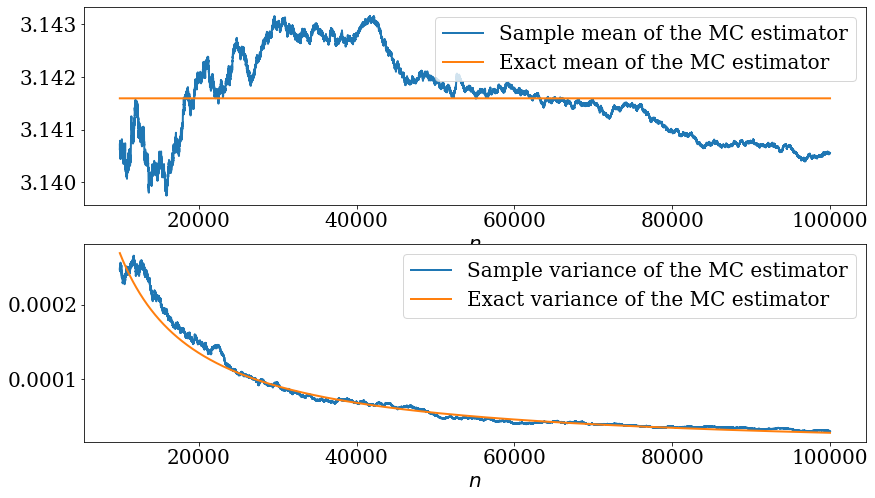

In [4]:
# Plot the mean and variance of the estimator
it = np.arange(1, n + 1)
mean = np.mean(Imn, axis=0)
var = np.var(Imn, axis=0)

# Calculate the exact covariance
var_f = (np.pi/4) * (4 - np.pi)**2 + (1 - np.pi/4) * np.pi**2
var_exact = var_f / np.arange(1, n + 1)

fig, ax = plt.subplots(2, 1)
cutoff = n // 10
ax[0].plot(it[cutoff:], mean[cutoff:],
           label="Sample mean of the MC estimator")
ax[0].plot(it[cutoff:], 0*it[cutoff:] + np.pi,
           label="Exact mean of the MC estimator")
ax[1].plot(it[cutoff:], var[cutoff:],
           label="Sample variance of the MC estimator")
ax[1].plot(it[cutoff:], var_exact[cutoff:],
           label="Exact variance of the MC estimator")
ax[0].set_xlabel('$n$')
ax[1].set_xlabel('$n$')
ax[0].legend()
ax[1].legend()
plt.show()

# Histogram of $\hat I_n$ (here we use more replicas)
By the CLT, we expect the PDF of $\hat I_n$ to be close to Gaussian.

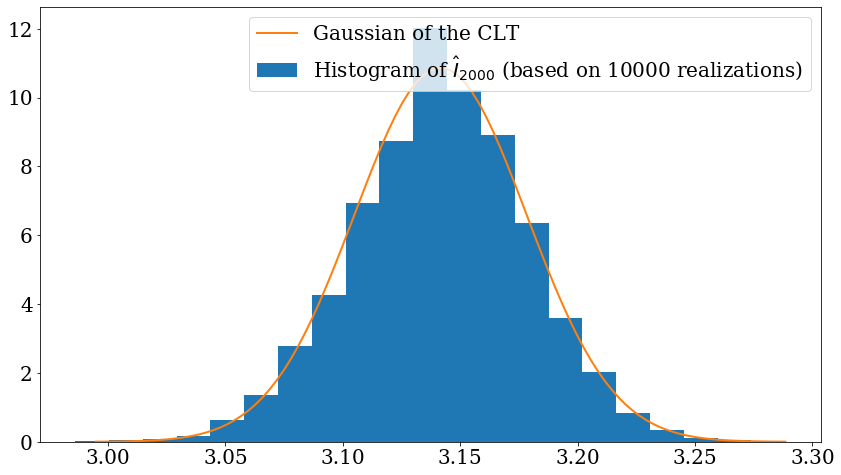

In [5]:
n_hist, m_hist = 2000, 10000
np.random.seed(0)
In = [MC_circle(n_hist, return_all=False) for i in range(m_hist)]
var = (1/n_hist) * ((np.pi/4) * (4 - np.pi)**2 + (1 - np.pi/4) * np.pi**2)
fig, ax = plt.subplots()
x_plot = np.pi + 4*np.sqrt(var) * np.linspace(-1, 1, 100)
ax.hist(In, bins=20, density=True,
        label="Histogram of $\\hat I_{{ {} }}$ (based on {} realizations)"\
                .format(n_hist, m_hist))
ax.plot(x_plot, 1/np.sqrt(2*np.pi*var)*np.exp(-(x_plot - np.pi)**2/var/2),
        label="Gaussian of the CLT")
ax.legend()
plt.show()

# Construction of confidence intervals

Here we discuss the three different techniques seen in class.

## Using Chebyshev's inequality

Chebyshev's inequality reads, employing the notations
$\mu = \mathbb E(X)$ and $\sigma = \sqrt{\textrm{var}(X)}$,
$$
\mathbb P(|X - \mu| \geq k \sigma) \leq \frac{1}{k^2}.
$$
Applying this inequality with $X = \hat I_n = \frac{1}{n} \sum_{i=1}^n f(Z_n)$,
and letting $\sigma = \sqrt{\textrm{var}(f(Z))}$,
we obtain
$$
\mathbb P\left(|\hat I_n - I| \geq \frac{k\sigma}{\sqrt{n}}\right) \leq \frac{1}{k^2}.
$$
We deduce that, with probability at least $(1 - \alpha)$,
it holds that
$$
|\hat I_n - I| \leq \left(\frac{\sigma}{\sqrt{n}}\right) \, \frac{1}{\sqrt{\alpha}}.
$$

## Using the central limit theorem

The CLT informs us that,
$$
\lim_{n \to \infty} \mathbb P\left( \left|\frac{\hat I_n - I}{\sigma/\sqrt{n}} \right| \leq a \right) = \int_{-a}^a \gamma(x) \, \mathrm{d} x = \textrm{erf}(a/\sqrt{2}),
$$
where $\gamma(\cdot)$ is the PDF of $\mathcal N(0, 1)$.
Therefore, for large $n$,
it holds with probability approximately $(1 - \alpha)$ that
$$
|\hat I_n - I| \leq \left(\frac{\sigma}{\sqrt{n}}\right) \, \sqrt{2} \textrm{erf}^{-1}(1 - \alpha)
$$

## Using a more precise, non-asymptotic result

Bikelis' theorem states that, if $\{Z_i\}_{i \in \mathbb N}$ is a sequence of real-valued independent random variables
(not necessarily identically distributed),
such that $\mathbb E Z_i = 0$ and that
there exists $0 < \gamma \leq 1$ such that $\mathbb E (|Z_i|^{2 + \gamma}) < \infty$ for all $i$,
then there exists a universal constant $A \in [1/\sqrt{2 \pi}, 1)$ such that:
$$
\forall x \in \mathbb R \qquad |\Phi_n(x) - \Phi(x)| \leq \frac{A}{B_n^{1+\gamma/2} \, (1 + |x|)^{2 + \gamma}} \, \sum_{i = 1}^N \mathbb E (|Z_i|^{2+\gamma}).
$$
Here $\Phi(x)$ is the CDF of $\mathcal N(0, 1)$ and
$$
B_n = \sum_{i = 1}^N \textrm{var}(Z_i), \qquad \Phi_n(x) = \mathbb P \left( \frac{1}{\sqrt{B_n}} \sum_{i=1}^N Z_i \leq x \right)
$$
If the random variables $\{Z_i\}_{i \in \mathbb N}$ are identically distributed,
the statement takes a simpler form:
$$
\forall x \in \mathbb R \qquad |\Phi_n(x) - \Phi(x)| \leq \frac{A \, n}{(\sqrt{n} \, \sigma)^{2+\gamma} \, (1 + |x|)^{2 + \gamma}} \, \mathbb E (|Z_1|^{2+\gamma}).
$$
Using this theorem with $\gamma = 1$ and $A = 1$,
and denoting by $\Phi_n$ the CDF of $\frac{\sqrt{N}}{\sigma}(\hat I_n - I)$,
we deduce
$$
\mathbb P\left(\left|\frac{\hat I_n - I}{\sigma/\sqrt{n}} \right| \leq a \right) = \Phi_n(a) - \Phi_n(-a)
\geq \Phi(a) - \Phi(-a) - \frac{2}{\sqrt{n} \, \sigma^3 \, (1 + |a|)^{3}} \, \mathbb E (|Z_1|^{3}).
$$

## Comparison of the bounds obtained with Chebyshev's inequality and the CLT

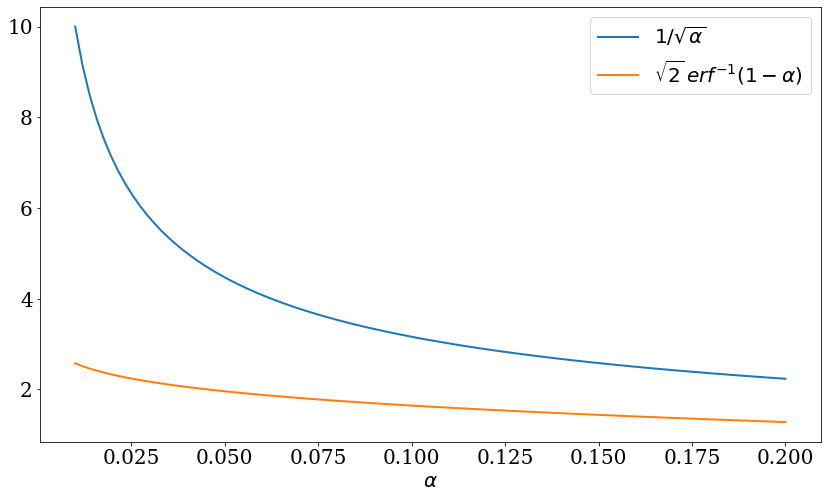

In [6]:
fig, ax = plt.subplots()
alphas = np.linspace(.01, .2, 100)
ax.plot(alphas, 1/np.sqrt(alphas),
        label="$1/\\sqrt{{\\alpha}}$")
ax.plot(alphas, np.sqrt(2)*scipy.special.erfinv(1 - alphas),
        label="$\sqrt{2} \\, erf^{{-1}}(1 - \\alpha)$")
ax.legend()
ax.set_xlabel('$\\alpha$')
plt.show()

In [7]:
# Plot the 95% confidence intervals based on the sample variance,
# for the first MC simulation

# Calculate exact moments
m1 = np.pi
m2 = (np.pi/4) * (4 - np.pi)**2 + (1 - np.pi/4) * np.pi**2
m3 = (np.pi/4) * (4 - np.pi)**3 + (1 - np.pi/4) * np.pi**3

alpha = .05
n_samples = np.arange(1, n + 1)
width_clt = np.sqrt(2)*scipy.special.erfinv(1 - alpha) * np.sqrt(m2/n_samples)
width_cheb = 1/np.sqrt(alpha) * np.sqrt(m2/n_samples)

# Calculate width associated with Bikelis's theorem
def fun_bikelis(a):
    return scipy.special.erf(a/np.sqrt(2)) \
           - 2*m3/(m2**(3/2)*(1 + np.abs(a))**3)/np.sqrt(n_samples)

# Fixed-point method to calculate the root of fun_bikelis and thereby
# find the best (narrowest) confidence interval for each n
#
# Take the width given by the CLT as initial guess
a = np.zeros(n) + np.sqrt(2)*scipy.special.erfinv(1 - alpha)

# Check error commited:
print(fun_bikelis(a))

[0.82547406 0.86194686 0.87810491 ... 0.94960621 0.94960621 0.94960621]


In [8]:
# i.e. for low values of `n`, the 95% confidence interval constructed from the
# CLT is not actually a 95% confidence interval!

# Apply the fixed point method
for i in range(40):
    a = a - (fun_bikelis(a) - (1 - alpha))

# Check that we are close: this calculates a lower bound on the probability
# that (I_n - I)/(σ/√n) ≤ a_n -- we want this to be close to (1 - α)
print(fun_bikelis(a))

[0.94538983 0.94736486 0.94815378 ... 0.94999724 0.94999724 0.94999724]


## Comparison of the confidence intervals

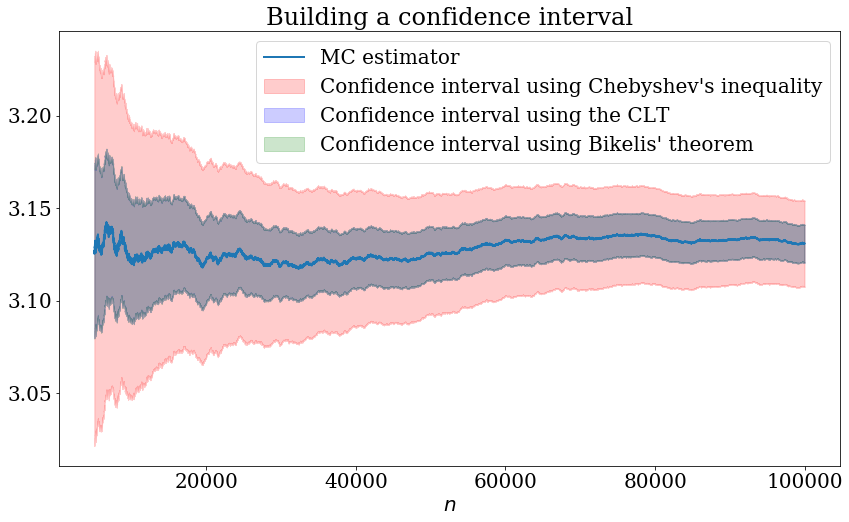

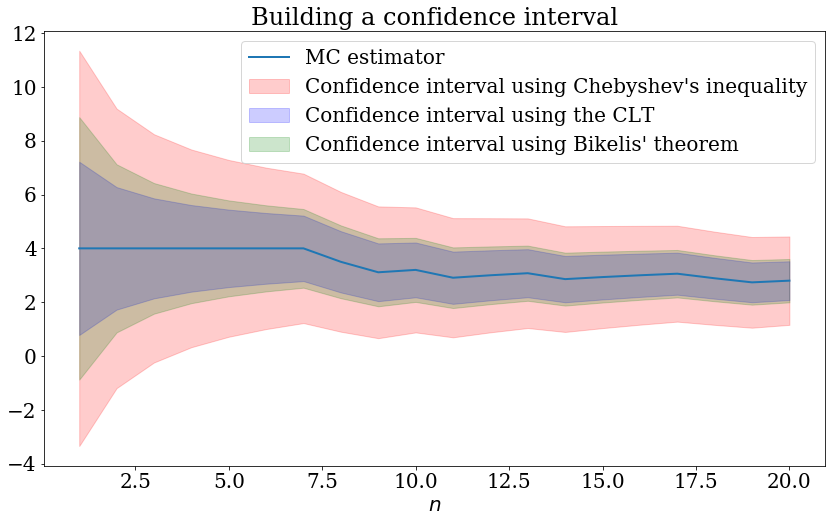

In [9]:
width_bikelis = a * np.sqrt(m2/n_samples)

# Truncate for plots
cutoff = n // 20

def plot_intervals(indices):
    fig, ax = plt.subplots()
    ax.set_title("Building a confidence interval")
    ax.plot(it[indices], Imn[0][indices], label="MC estimator")
    ax.fill_between(it[indices], Imn[0][indices] - width_cheb[indices],
                    Imn[0][indices] + width_cheb[indices], color='red', alpha=.2,
                    label="Confidence interval using Chebyshev's inequality")
    ax.fill_between(it[indices], Imn[0][indices] - width_clt[indices],
                    Imn[0][indices] + width_clt[indices], color='blue', alpha=.2,
                    label="Confidence interval using the CLT")
    ax.fill_between(it[indices], Imn[0][indices] - width_bikelis[indices],
                    Imn[0][indices] + width_bikelis[indices], color='green', alpha=.2,
                    label="Confidence interval using Bikelis' theorem")
    ax.set_xlabel('$n$')
    ax.legend()
    plt.show()

plot_intervals(range(len(it) // 20, len(it)))
plot_intervals(range(20))

As we see, when `n` is large applying Bikelis' theorem produces a confidence
interval very close to the one calculated via the CLT.